In [58]:
%matplotlib widget
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
df=df.iloc[:,2:]
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [5]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df.drop('Purchased',axis=1),df['Purchased'],test_size=0.3,random_state=0)
print(x_train.shape)
print(x_test.shape)

(280, 2)
(120, 2)


# Standard Scaler

In [11]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

# fit the scaler to the training data
scaler.fit(x_train)      #learn mean & std from train data and then scale both train and test data

StandardScaler()

In [16]:
# transform train and test sets
x_train_scaled=scaler.transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [17]:
scaler.mean_

array([3.78642857e+01, 6.98071429e+04])

## problem is that scaler takes a dataframe but returns a numpy array

In [18]:
x_train_scaled=pd.DataFrame(x_train_scaled,columns=x_train.columns)
x_test_scaled=pd.DataFrame(x_test_scaled,columns=x_test.columns)

In [20]:
x_train_scaled.tail()

,Age,EstimatedSalary
275,0.993704,-1.151185
276,-0.869053,-0.775237
277,-0.182774,-0.514966
278,-1.065133,-0.457127
279,-1.163172,1.393691


# original data mean and std

In [21]:
np.round(x_train.describe(),1)

,Age,EstimatedSalary
count,280.0,280.0
mean,37.9,69807.1
std,10.2,34641.2
min,18.0,15000.0
25%,30.0,43000.0
50%,37.0,70500.0
75%,46.0,88000.0
max,60.0,150000.0


# scaled data mean and standard deviation

In [22]:
np.round(x_train_scaled.describe(),1)

,Age,EstimatedSalary
count,280.0,280.0
mean,0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.8,-0.8
50%,-0.1,0.0
75%,0.8,0.5
max,2.2,2.3


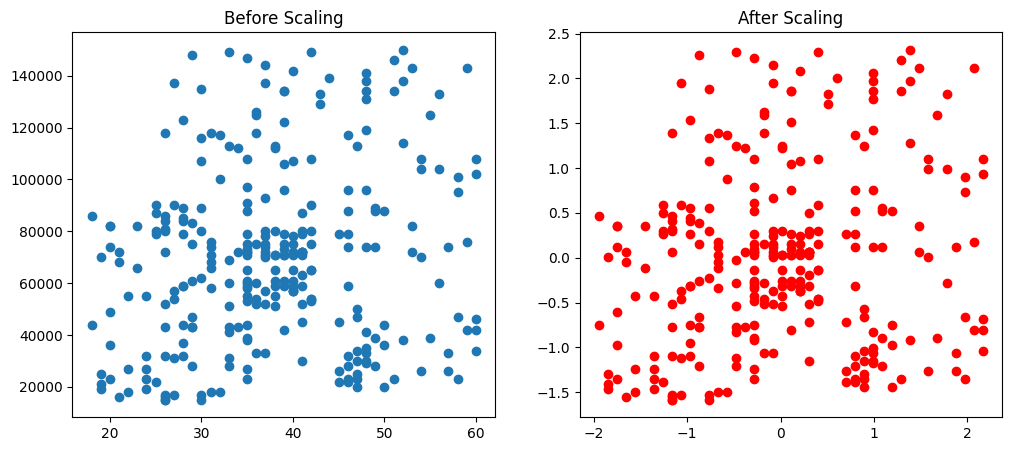

In [36]:
fig, (ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))
ax1.scatter(x_train['Age'],x_train['EstimatedSalary'])
ax1.set_title('Before Scaling')
ax2.scatter(x_train_scaled['Age'],x_train_scaled['EstimatedSalary'],c='red')
ax2.set_title('After Scaling')
plt.show()

# see the usefulness of scaling

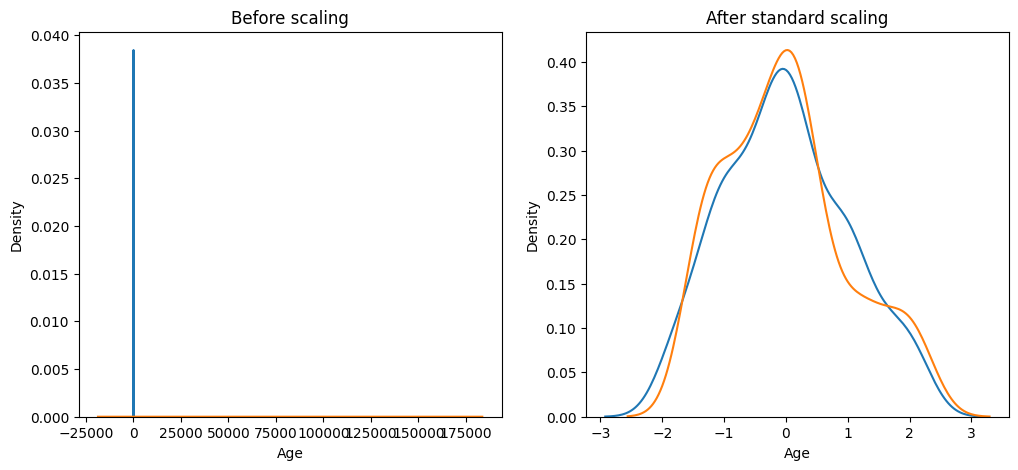

In [43]:
fig, (ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))
# before scaling
ax1.set_title('Before scaling')
sns.kdeplot(x_train['Age'],ax=ax1)
sns.kdeplot(x_train['EstimatedSalary'],ax=ax1)

# after scaling
ax2.set_title('After standard scaling')
sns.kdeplot(x_train_scaled['Age'],ax=ax2)
sns.kdeplot(x_train_scaled['EstimatedSalary'],ax=ax2)
plt.show()

# comparison of scaling

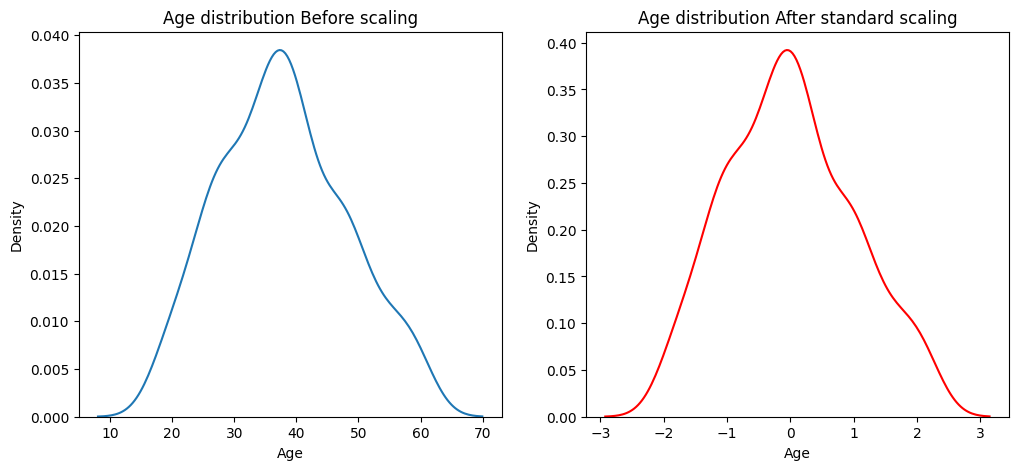

In [48]:
fig, (ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))
# before scaling
ax1.set_title('Age distribution Before scaling')
sns.kdeplot(x_train['Age'],ax=ax1)

# after scaling
ax2.set_title('Age distribution After standard scaling')
sns.kdeplot(x_train_scaled['Age'],ax=ax2,c='r')
plt.show()

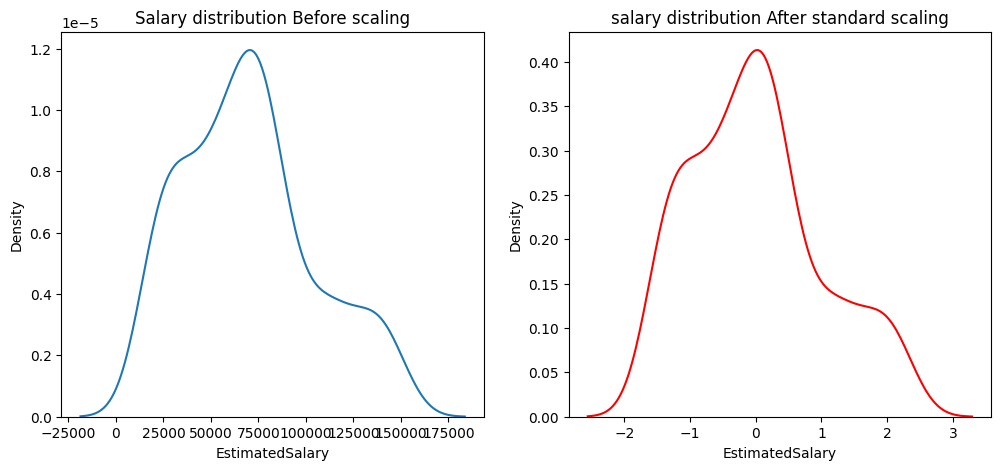

In [47]:
fig, (ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))
# before scaling
ax1.set_title('Salary distribution Before scaling')
sns.kdeplot(x_train['EstimatedSalary'],ax=ax1)

# after scaling
ax2.set_title('salary distribution After standard scaling')
sns.kdeplot(x_train_scaled['EstimatedSalary'],ax=ax2,c='r')
plt.show()

# why scaling is important

In [49]:
from sklearn.linear_model import LogisticRegression

In [50]:
lr=LogisticRegression()
lr_scaled=LogisticRegression()

In [53]:
lr.fit(x_train,y_train)
lr_scaled.fit(x_train_scaled,y_train)

LogisticRegression()

In [54]:
y_pred=lr.predict(x_test)
y_pred_scaled=lr_scaled.predict(x_test_scaled)

In [55]:
from sklearn.metrics import accuracy_score

In [56]:
print(f'Actual:{accuracy_score(y_test,y_pred)}')
print(f'Scaled:{accuracy_score(y_test,y_pred_scaled)}')

Actual:0.6583333333333333
Scaled:0.8666666666666667
